In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt,math
%matplotlib inline

In [ ]:
def f(x):
    return 4*x**2 + 5*x + 7

In [ ]:
f(3)

58

[<matplotlib.lines.Line2D>]

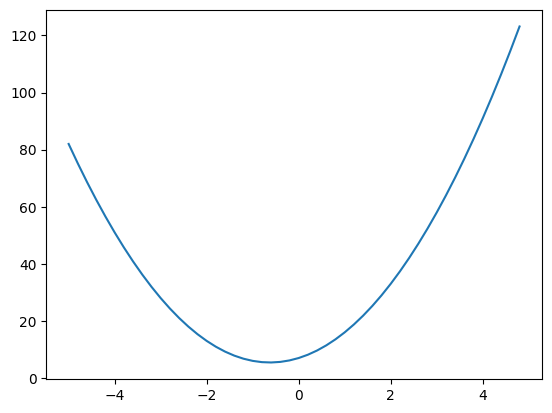

In [ ]:
xz  = np.arange(-5, 5, 0.20)
yz = f(xz)
plt.plot(xz,yz)

In [ ]:
h= 1e-4
x= 3.
(f(x + h) -f(x))/h

29.00040000007209

In [ ]:
a = 2.5
b = 3.5
c = 15
d = a*b+c
print(d)

23.75


In [ ]:
h = 0.00001

#inputs
a = 2.5
b = -3.5
c = 15

d1 = a*b+c
c += h
d2 = a*b+c
print('d1',d1)
print('d2',d2)
slope = (d2-d1)/h
print('slope', slope)

d1 6.25
d2 6.25001
slope 0.9999999999621422


In [ ]:
class value:
    def __init__(self,data,_children=(), _op = '', label =''):
        self.data = data
        self._prev = set(_children)
        self.grad = 0.0
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f'Value(data={self.data})'
    
    def __add__(self,other):
        res = value(self.data + other.data, (self,other), '+')
        return res
    
    def __mul__(self,other):
        res = value(self.data * other.data, (self,other), '*')
        return res
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = value(t, (self,), 'tanh')
        return out
        
    def __floordiv__(self,other):
        res = value(self.data // other.data, (self,other), '/')
        return res
    
    
a = value(4, label = 'a')
b = value(-3, label = 'b')
c = value(8, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label='d'
f = value(2.0, label = 'f')
L = d * f; L.label= 'L'
L

Value(data=-8.0)

In [ ]:
d._prev

{Value(data=-12), Value(data=8)}

In [ ]:
d._op

'+'

In [ ]:
from graphviz import Digraph


def trace(root):
    # builds all the set of all nodes and edges in a graph
    nodes,edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) #LR - Left to Right
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node
        dot.node(name = uid, label = "{ %s|data %.4f| grad %.4f}" % (n.label,n.data,n.grad), shape = 'record')
        if n._op:
            # if this value is the result of some operation, create an op node for it
            dot.node(name= uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op,uid)
            
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        
    return dot    

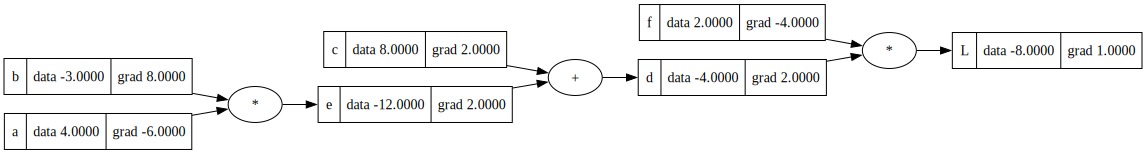

In [ ]:
draw_dot(L)

#### Here we are going to calcualte gradients manually, with the derivative eq
- L = d*f
- dL/dd -> f

- (f(x+h) - f(x))/h

- ((d+h)*f - (d*f))/h
- (d*f+h*f - d*f)/h
- (h*f)/h 
- f

dd/dc = 1.
dd/de = 1.
d = c + e

(f(x+h)-f(x))/h
((c+h+e) - (c+e))/h
(c+h+e-c-e)/h
h/h
1.0

want:
dL/dc = (dL/dd)*(dd/dc) # chain rule
know:
dL/dd
dd/dc

dL/de = 2.0
de/da = b, de/db = a # those are the local gradients
dL/da = (dL/de)*(de/da)


In [ ]:
#one step of optimazation, we mult the grad by a small amount to optimize
a.data += a.grad * 0.01
b.data += b.grad * 0.01
c.data += c.grad * 0.01
f.data += f.grad * 0.01

e = a*b
d = e+ c
L = d*f
print(L.data)

-5.720064000000001


In [ ]:
L.grad = 1.0
d.grad = 2.0
f.grad = -4.0
c.grad = 2.
e.grad = 2.
a.grad = -6
b.grad = 8


In [ ]:
def lol():
    #to check and verify our backpropagation results
    h =0.0001
    a = value(4, label = 'a')
    b = value(-3, label = 'b')
    c = value(8, label = 'c')
    e = a*b; e.label = 'e'
    d = e+ c; d.label='d'
    f = value(2.0, label = 'f')
    L = d*f; L.label= 'L'
    L1 = L.data
    
    a = value(4 , label = 'a')
    #a.data +=h if we add some value of h to a then derivative of DL/da will be the value of dL/da=(dL/de)*(de/da)=(2.* -3.) (chain rule), which is -6.0
    e = a*b; e.label = 'e'
    b = value(-3, label = 'b')
    #b.data +=h if we add some value of h to b then derivative of DL/db will be the value of dL/db=(dL/de)*(de/db)=(2.* 4.) (chain rule), which is 8.0
    c = value(8, label = 'c')
    #c.data +=h if we add some value of h to c then derivative of DL/dc will be the value of dL/dc=(dL/dd)*(dd/dc) (chain rule), which is 2.0
    e = a*b; e.label = 'e'
    #e.data +=h  if we add some value of h to e then derivative of DL/de will be the value of dL/de=(dL/dd)*(dd/de) (chain rule), which is 2.0
    d = e+ c; d.label='d'
    #d.data +=h if we add some value of h to d then derivative of DL/dd will be the value of f, which is 2.0
    f = value(2.0, label = 'f')
    #f.data +=h if we add some value of h to f then derivative of DL/df will be the value of d, which is -4.0
    L = d*f; L.label= 'L'
    L2 = L.data 
    
    print((L2 - L1)/h)
    
lol()

0.0


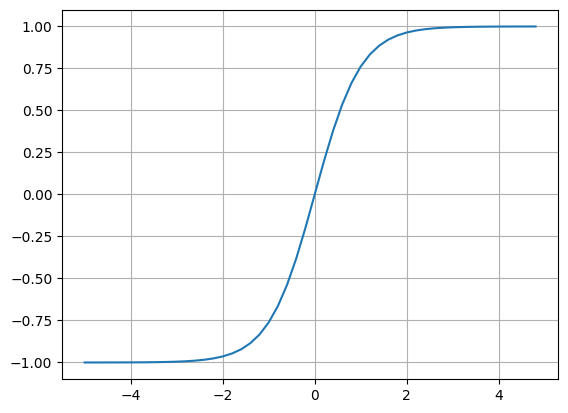

In [ ]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2)));plt.grid()

In [ ]:
#inputs
x1 = value(2.0, label = 'x1')
x2 = value(0.0, label = 'x2')
#weights
w1 = value(-3.0, label = 'w1')
w2 = value(1.0, label = 'w2')
#bias
b = value(6.8813735870195432, label = 'b')

x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

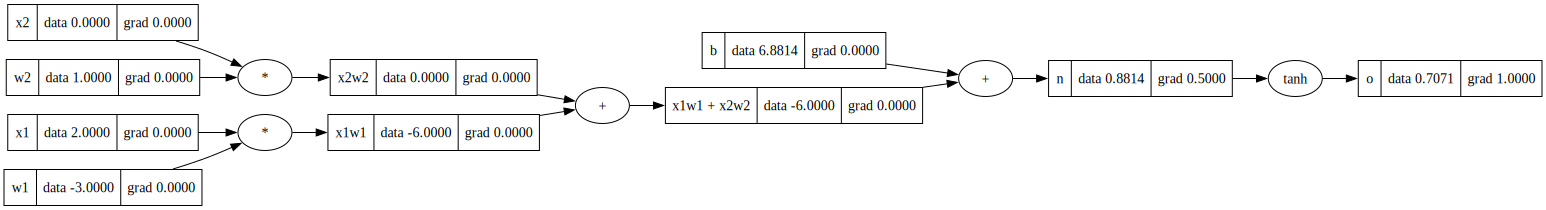

In [ ]:
draw_dot(o)

In [ ]:
o.grad=1.0
n.grad = 0.5

In [ ]:
# o = tanh(n)
# do/dn = 1 - tanh**2= 1 - o**2
#1 - o.data**2